In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# synthetic data
samples_per_class = 1000
negative_class = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=samples_per_class)
positive_class = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=samples_per_class)

In [4]:
negative_class[0:10]

array([[ 1.99961486,  3.90652413],
       [-2.60537413,  2.23435759],
       [-0.96538547,  4.82099401],
       [ 1.28110998,  4.1459944 ],
       [-2.0909992 ,  4.43380479],
       [-0.04324473,  2.51027971],
       [-1.26617102,  1.36220761],
       [-0.02417717,  3.18703227],
       [-1.62432377,  2.58146577],
       [ 0.11722694,  4.20495359]])

In [5]:
# sythetic data
inputs = np.vstack((negative_class, positive_class)).astype(np.float32)

In [19]:
# sythetic class
targets = np.vstack((np.zeros((samples_per_class,1),dtype='float32'),np.ones((samples_per_class,1),dtype='float32')))

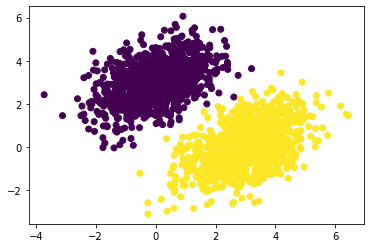

In [9]:
plt.scatter(inputs[:,0],inputs[:,1], c=target[:,0])
plt.show()

In [12]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [13]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [23]:
def loss_function(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [24]:
# training step
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_function(targets, predictions)
    gradient_loss_wrt_W, gradient_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(gradient_loss_wrt_W * learning_rate)
    b.assign_sub(gradient_loss_wrt_b * learning_rate)
    return loss

In [25]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step} is {loss}')

Loss at step 0 is 2.010895013809204
Loss at step 1 is 0.3059888184070587
Loss at step 2 is 0.13583780825138092
Loss at step 3 is 0.1078903079032898
Loss at step 4 is 0.09858163446187973
Loss at step 5 is 0.09212914854288101
Loss at step 6 is 0.08648119866847992
Loss at step 7 is 0.0813395082950592
Loss at step 8 is 0.07663224637508392
Loss at step 9 is 0.07231933623552322
Loss at step 10 is 0.06836730986833572
Loss at step 11 is 0.06474591791629791
Loss at step 12 is 0.06142747402191162
Loss at step 13 is 0.05838664621114731
Loss at step 14 is 0.055600203573703766
Loss at step 15 is 0.05304688215255737
Loss at step 16 is 0.050707168877124786
Loss at step 17 is 0.04856318235397339
Loss at step 18 is 0.046598564833402634
Loss at step 19 is 0.04479830339550972
Loss at step 20 is 0.04314863681793213
Loss at step 21 is 0.04163699224591255
Loss at step 22 is 0.040251798927783966
Loss at step 23 is 0.03898249939084053
Loss at step 24 is 0.037819378077983856
Loss at step 25 is 0.03675356134772

In [26]:
print(f'The learned weights are {W}')
print (f'The bias is {b}')

The learned weights are <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.17907533],
       [-0.11811835]], dtype=float32)>
The bias is <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3840949], dtype=float32)>


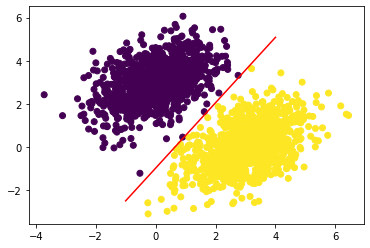

In [30]:
# plotting the equation of the line or making predictions with the learned parameters
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
predictions = model(inputs)
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)